# 1주차 3교시 데이터 분석(EDA) 실습 과제
### 아래 설명을 읽고 질문에 답해주세요.   
#### 해당 과제에 대한 부담 없이 아래 코드의 순서를 따라와주시면서 데이터 분석과정에 대한 공부를 한다고 생각해주시면 됩니다☀️   
   
   ### 📍세션의 과제는 아래에 있습니다. 실습을 마친 후 실습완료하신 내용을 기반으로 과제를 수행 후 GitHub에 업로드 해주세요!📍



In [3]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv('/Users/suhyun/Desktop/suhyun/대외활동/동아리/투빅스/정규세션/강의준비-EDA/online_retail.csv')

# 1. 결측치 처리
print("결측치 개수:\n", df.isnull().sum())
df.dropna(inplace=True)

# 2. 이상치 처리
# IQR 방식으로 이상치 탐지 및 제거
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]

# 3. Total_Amount 열 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
print("전처리 완료. 데이터 크기:", df.shape)

결측치 개수:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
전처리 완료. 데이터 크기: (10000, 9)


### 2. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계(평균, 중앙값, 표준편차)를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
상위 5개 국가:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


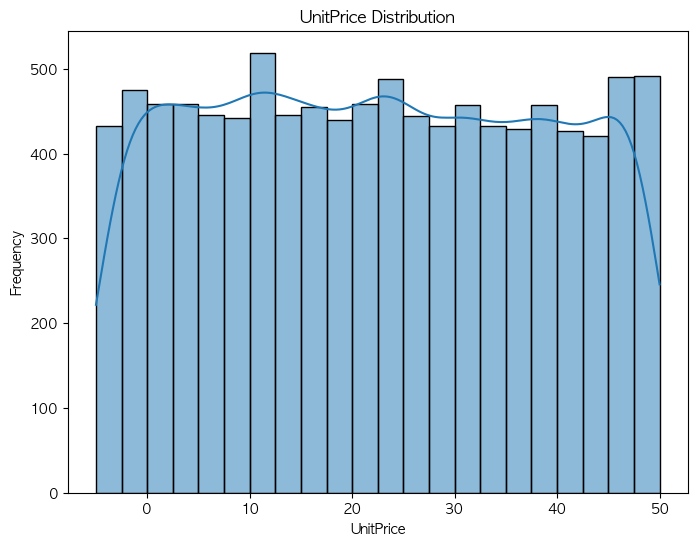

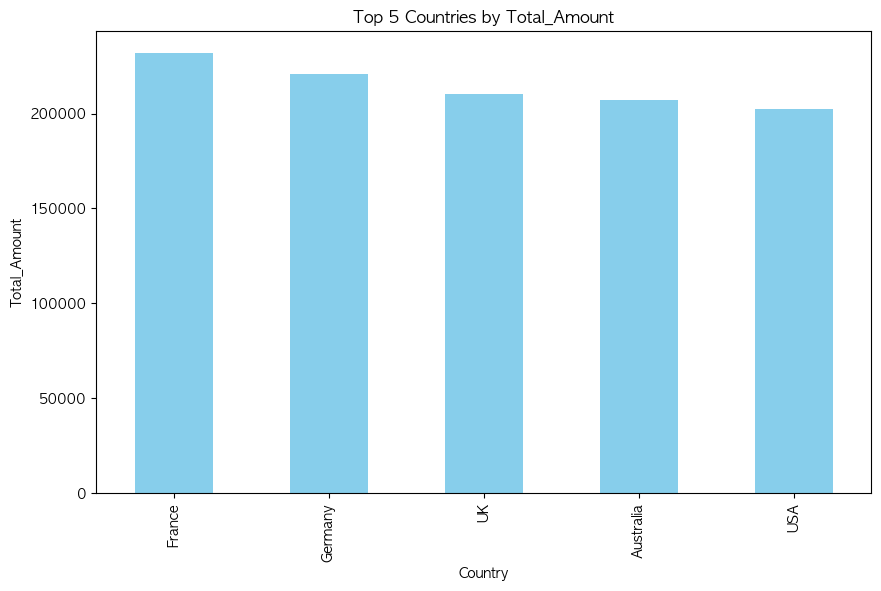

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 기술통계
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe())

# 2. Country별 Total_Amount 합계
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print("상위 5개 국가:\n", country_sales)

# 3. 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Total_Amount')
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()

### 3. 상관분석
#### 요구사항
1. `Quantity`와 `Total_Amount` 간의 상관계수를 계산하시오:
   - Pearson 상관계수와 Spearman 상관계수를 각각 계산하시오.
2. 상관분석 결과를 해석하시오:
   - 두 변수 간 관계가 강한지, 약한지, 선형 관계가 있는지 설명하시오.

In [5]:
from scipy.stats import pearsonr, spearmanr

# Pearson 상관계수
pearson_corr, _ = pearsonr(df['Quantity'], df['Total_Amount'])

# Spearman 상관계수
spearman_corr, _ = spearmanr(df['Quantity'], df['Total_Amount'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7764295146911522
Spearman Correlation: 0.8150877232931539


### 4. Feature Engineering
#### 요구사항
1. `InvoiceDate`에서 연도와 월을 추출하여 `Year`와 `Month` 열을 생성하시오.
2. 월별 `Total_Amount`의 합계를 계산하고, 시간에 따른 추세를 시각화하시오.

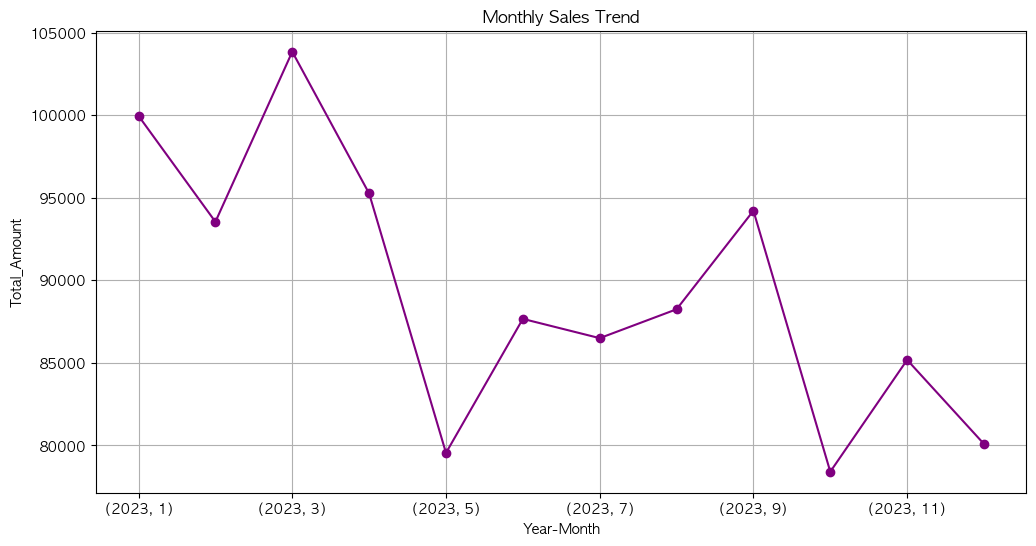

In [7]:
# 연도와 월 추출
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# 월별 Total_Amount 합계
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum()

# 시각화
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total_Amount')
plt.grid()
plt.show()

### 5. 회귀분석 및 회귀진단
#### 요구사항
1. `Quantity`를 독립변수, `Total_Amount`를 종속변수로 사용하여 단순 선형 회귀 모델을 생성하시오.
2. 회귀 계수와 \( R^2 \) 값을 계산하시오.
3. 잔차의 정규성을 Q-Q Plot으로 확인하시오.
4. 잔차와 예측값 간의 관계를 산점도로 나타내고, 결과를 해석하시오.

Coefficient: 22.299071797558316
Intercept: 2.863978418426626
R^2 Score: 0.6028427912835151


<Figure size 800x600 with 0 Axes>

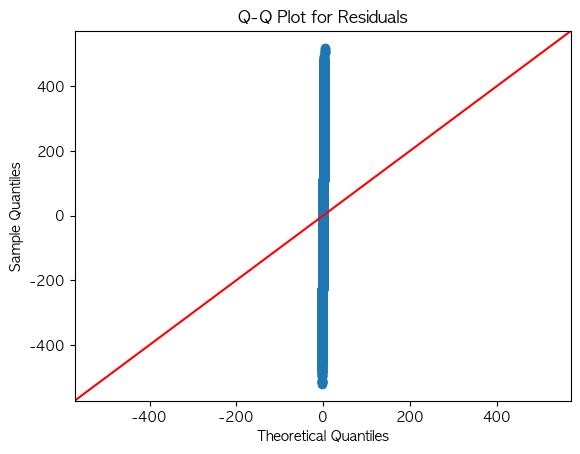

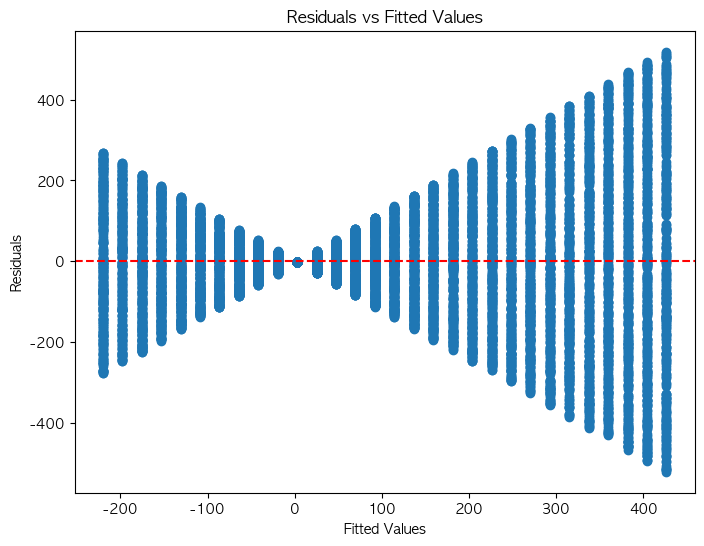

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 회귀 분석
X = df[['Quantity']]
y = df['Total_Amount']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 회귀 계수 및 R^2
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 Score: {r2_score(y, y_pred)}")

# 잔차 분석
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot for Residuals')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

__________
# 이제 과제 시작!

### 1. 데이터 로드
#### 요구사항
- 주어진 `online_retail.csv` 파일을 불러오세요.
- 데이터를 확인하고, 컬럼 정보를 출력하세요.

In [41]:
# 1. 데이터 로드
import pandas as pd
df = pd.read_csv("C:/Users/USER/Desktop/투빅스 23기/과제데이터_online_retail.csv")

# 데이터 확인
# TODO: 데이터의 상단 몇 개 행을 출력하는 코드를 작성하세요.

#column 정보 확인
df.info()

#상위 10개 행 데이터 확인
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  10000 non-null  object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   10000 non-null  object 
 7   Country      10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,I07271,S089,Product 67,12,2023-09-20,17.305292,C0320,Australia
1,I00861,S095,Product 4,12,2023-05-31,34.734999,C0246,UK
2,I05391,S041,Product 96,-6,2023-07-31,36.367197,C0213,Australia
3,I05192,S081,Product 1,-8,2023-07-11,34.778332,C0443,France
4,I05735,S047,Product 34,18,2023-08-31,11.037961,C0276,Australia
5,I06266,S094,Product 9,4,2023-04-08,29.981735,C0416,Germany
6,I00467,S054,Product 63,12,2023-01-29,13.619049,C0334,Australia
7,I04427,S055,Product 76,-6,2023-07-08,40.881023,C0280,Germany
8,I05579,S095,Product 10,11,2023-06-21,-1.968611,C0046,Australia
9,I08323,S019,Product 10,-8,2023-07-16,-2.925359,C0018,UK


### 2. 데이터 전처리
#### 요구사항
1. 결측치가 포함된 데이터를 처리하시오.
2. 이상치를 탐지하고 제거하시오:
   - `Quantity`와 `UnitPrice`에서 IQR 방식을 사용하세요.
3. 새로운 열 `Total_Amount`를 추가하시오:
   - `Total_Amount = Quantity × UnitPrice`

In [17]:
# 결측치 처리
# TODO: 결측치가 포함된 데이터를 확인하고 제거하는 코드를 작성하세요.
print("결측치 개수:\n", df.isnull().sum())

결측치 개수:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [37]:
# 이상치 처리
# TODO: Quantity와 UnitPrice 변수에 대한 IQR을 출력하는 함수를 만드세요(e. def iqr(변수명))
# TODO: Quantity와 UnitPrice 변수를 제작한 함수에 넣어 결과를 출력하세요.
def iqr(x):
    Q1_Quantity=x.quantile(0.25)
    Q3_Quantity=x.quantile(0.75)
    iqr=Q3_Quantity-Q1_Quantity
    return(iqr)
    
iqr_quantity=iqr(df['Quantity'])
iqr_unitprice=iqr(df['UnitPrice'])

print(f'IQR_Quantity:{iqr_quantity}')
print(f'IQR_UnitPrice:{iqr_unitprice}')

IQR_Quantity:15.0
IQR_UnitPrice:27.502537271868874


In [55]:
# Total_Amount 열 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

### 3. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

In [57]:
# 기술통계
# TODO: UnitPrice와 Quantity의 기술통계를 계산하는 코드를 작성하세요.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 기술통계
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe())

# Country별 Total_Amount 합계
print(df.groupby('Country')['Total_Amount'].sum())

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
Country
Australia    207078.422872
France       231937.087319
Germany      220825.672623
UK           210195.166526
USA          202445.284759
Name: Total_Amount, dtype: float64


In [59]:
# TODO: Country별 Total_Amount를 계산하고, 상위 5개 국가를 출력하는 코드를 작성하세요.
print(df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5))

Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284759
Name: Total_Amount, dtype: float64


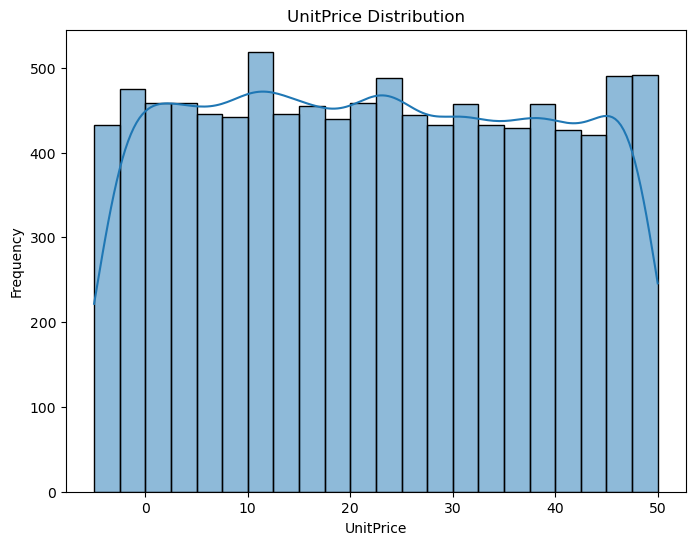

In [61]:
# 히스토그램
# TODO: UnitPrice의 분포를 시각화하세요.
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True)
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()